# The Sparks Foundation

**GRIP-Data Science and Business Analytics -October 2021 [#GRIPOCT21]**

**Task-1 : Prediction using Supervised ML. (Level - Beginner)**

***Name : Keerthiraj K C***


Problem Statement : 
1. Predict the percentage of an student based on the number of study hours.
2. What will be predicted score if a student studies for 9.25 hrs/day


***Import all necessary libraries and load data***

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***lets check the relationship between two variables - using plot***

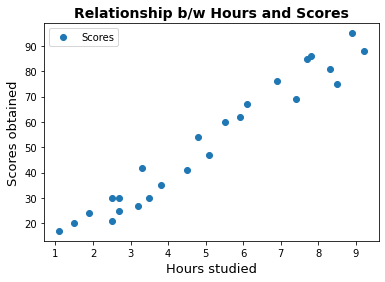

In [8]:
data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Relationship b/w Hours and Scores', fontsize = 14, weight = 'bold')
plt.xlabel('Hours studied', fontsize =13)
plt.ylabel('Scores obtained', fontsize = 13)
plt.show()

In [9]:
#lets check correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**The plot and correlation shows, there is a positive relation between hours studied and scores obtained by students.***

***Next step***

**Preparing data for train_test_split**

In [27]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [29]:
#split data into training and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [32]:
#train our algorithm

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

print('Training completed')

Training completed


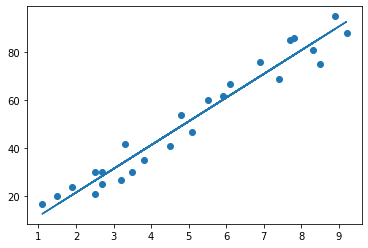

In [39]:
#now plot the regression line

line = lm.coef_*X + lm.intercept_

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

***Making predictions***

In [40]:
#problem statement 1: Predict the percentage of an student based on the number of study hours

print(X_test)
y_pred = lm.predict(X_test)

[[3.8]
 [3.5]
 [1.1]
 [6.1]
 [5.5]
 [8.3]
 [1.5]]


In [41]:
#compairing Actual vs predicted

compaired_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

compaired_data

,Actual,Predicted
0,35,39.408198
1,30,36.445255
2,17,12.741718
3,67,62.124088
4,60,56.198203
5,81,83.852330
6,20,16.692308


In [45]:
#problem statement 2: What will be predicted score if a student studies for 9.25 hrs/day

hours = 9.25
pred_score = lm.predict([[hours]])

print('Number of hours studied = {}'. format(hours))
print('Predicted score = {}'. format(pred_score[0]))

Number of hours studied = 9.25
Predicted score = 93.23498034811905


**Now evaluate the performance of the model using mean_absolute_error from metrics**

In [50]:
from sklearn import metrics

print('mean_absolute_error :', metrics.mean_absolute_error(y_test, y_pred))

mean_absolute_error : 4.278495227400341


***93.24 is the predicted score if a student studies for 9.25 hrs/day.***

# END